In [1]:
"""
The Second-Order Moller-Plesset Perturbation Theory (MP2) Energy code
"""
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

#Please check the number of occupied MO in the molecule
OCC=5;
print("The number of occupied MO orbitals in the molecule is: ", OCC)

nu_repul=np.loadtxt('enuc.dat')
print("\n\nNuclear repulsion energy in Hartree: ",nu_repul,"\n")

#The overlap matrix
overlap=np.loadtxt('s.dat')
over_mat=np.zeros((int(overlap[overlap.shape[0]-1,0]), int(overlap[overlap.shape[0]-1,0])))
for row in range(overlap.shape[0]):
    i1=int(overlap[row,0])
    i2=int(overlap[row,1])
    val=overlap[row,2]
    over_mat[i1-1,i2-1]=over_mat[i2-1,i1-1]=val
print ("Overlap Integral Matrix \n \n")
for row in range(over_mat.shape[0]):
    for col in range(over_mat.shape[1]):
        print('{:11.8f}'.format(over_mat[row,col]),end=' ')
    print()



The number of occupied MO orbitals in the molecule is:  5


Nuclear repulsion energy in Hartree:  8.00236706181045 

Overlap Integral Matrix 
 

 1.00000000  0.23670394 -0.00000000 -0.00000000 -0.00000000  0.03840560  0.03840560 
 0.23670394  1.00000000  0.00000000 -0.00000000  0.00000000  0.38613884  0.38613884 
-0.00000000  0.00000000  1.00000000 -0.00000000  0.00000000  0.26843824 -0.26843824 
-0.00000000 -0.00000000 -0.00000000  1.00000000 -0.00000000  0.20972694  0.20972694 
-0.00000000  0.00000000  0.00000000 -0.00000000  1.00000000 -0.00000000 -0.00000000 
 0.03840560  0.38613884  0.26843824  0.20972694 -0.00000000  1.00000000  0.18175989 
 0.03840560  0.38613884 -0.26843824  0.20972694 -0.00000000  0.18175989  1.00000000 


In [2]:
#The kinetic energy matrix
kinetic=np.loadtxt('t.dat')
kinetic_mat=np.zeros((int(kinetic[kinetic.shape[0]-1,0]),int(kinetic[kinetic.shape[0]-1,0])))
for row in range(kinetic.shape[0]):
    i1=int(kinetic[row,0])
    i2=int(kinetic[row,1])
    val=kinetic[row,2]
    kinetic_mat[i1-1,i2-1]=kinetic_mat[i2-1,i1-1]=val
print ("\n Kinetic Energy Matrix \n \n")
for row in range(kinetic_mat.shape[0]):
    for col in range(kinetic_mat.shape[1]):
        print('{:11.8f}'.format(kinetic_mat[row,col]),end=' ')
    print()


 Kinetic Energy Matrix 
 

29.00319995 -0.16801094  0.00000000  0.00000000 -0.00000000 -0.00841638 -0.00841638 
-0.16801094  0.80812795  0.00000000 -0.00000000  0.00000000  0.07051737  0.07051737 
 0.00000000  0.00000000  2.52873120 -0.00000000  0.00000000  0.14709091 -0.14709091 
 0.00000000 -0.00000000 -0.00000000  2.52873120 -0.00000000  0.11492002  0.11492002 
-0.00000000  0.00000000  0.00000000 -0.00000000  2.52873120 -0.00000000 -0.00000000 
-0.00841638  0.07051737  0.14709091  0.11492002 -0.00000000  0.76003188 -0.00397987 
-0.00841638  0.07051737 -0.14709091  0.11492002 -0.00000000 -0.00397987  0.76003188 


In [3]:
#The nuclear attraction matrix
nuk_att=np.loadtxt('v.dat')
nuk_mat=np.zeros((int(nuk_att[nuk_att.shape[0]-1,0]),int(nuk_att[nuk_att.shape[0]-1,0])))
for row in range(nuk_att.shape[0]):
    i1=int(nuk_att[row,0])
    i2=int(nuk_att[row,1])
    val=nuk_att[row,2]
    nuk_mat[i1-1,i2-1]=nuk_mat[i2-1,i1-1]=val
print ("\n  Nuclear Att. Integrals are  \n \n")
for row in range(nuk_mat.shape[0]):
    for col in range(nuk_mat.shape[1]):
        print('{:11.7f}'.format(nuk_mat[row,col]),end=' ')
    print()
    


  Nuclear Att. Integrals are  
 

-61.5805954  -7.4108219   0.0000000  -0.0144738   0.0000000  -1.2316859  -1.2316859 
 -7.4108219 -10.0090712   0.0000000  -0.1768902   0.0000000  -2.9772272  -2.9772272 
  0.0000000   0.0000000  -9.9875505   0.0000000  -0.0000000  -1.8222411   1.8222411 
 -0.0144738  -0.1768902   0.0000000  -9.9440430   0.0000000  -1.4717883  -1.4717883 
  0.0000000   0.0000000  -0.0000000   0.0000000  -9.8758761   0.0000000   0.0000000 
 -1.2316859  -2.9772272  -1.8222411  -1.4717883   0.0000000  -5.3002030  -1.0671660 
 -1.2316859  -2.9772272   1.8222411  -1.4717883   0.0000000  -1.0671660  -5.3002030 


In [4]:
#np.set_printoptions(precision=4)
#The the core Hamiltonian matrix
H_core=kinetic_mat+nuk_mat
print ("\n This is the Core Hamiltonian Matrix \n \n")
for row in range(H_core.shape[0]):
    for col in range(H_core.shape[1]):
        print('{:11.7f}'.format(H_core[row,col]),end=' ')
    print()


 This is the Core Hamiltonian Matrix 
 

-32.5773954  -7.5788328   0.0000000  -0.0144738   0.0000000  -1.2401023  -1.2401023 
 -7.5788328  -9.2009433   0.0000000  -0.1768902   0.0000000  -2.9067098  -2.9067098 
  0.0000000   0.0000000  -7.4588193   0.0000000   0.0000000  -1.6751501   1.6751501 
 -0.0144738  -0.1768902   0.0000000  -7.4153118   0.0000000  -1.3568683  -1.3568683 
  0.0000000   0.0000000   0.0000000   0.0000000  -7.3471449   0.0000000   0.0000000 
 -1.2401023  -2.9067098  -1.6751501  -1.3568683   0.0000000  -4.5401711  -1.0711459 
 -1.2401023  -2.9067098   1.6751501  -1.3568683   0.0000000  -1.0711459  -4.5401711 


In [44]:
"""
Reading in the the two electron integrals
"""

   #The first index function
def index1(i, j):
    ij=(i*(i+1)/2)+j
    return ij

#The second index function
def index2(i, j, k, l):
    if (i>j):
        ij=index1(i,j)
    else:
        ij=index1(j,i)      
    if (k>l):
        kl=index1(k,l)
    else:
        kl=index1(l,k)     
    if (ij> kl):
        ijkl=int(index1(ij,kl))
    else:
        ijkl=int(index1(kl,ij))
    return ijkl
    




ele_int=np.loadtxt('eri.dat')
#np.set_printoptions(threshold=10000)

timing.log('Tracking the element allocation ')
d_I =np.zeros(10000)
for row in range(ele_int.shape[0]):
    i=int(ele_int[row,0])
    j=int(ele_int[row,1])
    k=int(ele_int[row,2])
    l=int(ele_int[row,3])
    val=ele_int[row,4]
    ijkl=int(index2(i,j,k,l))
    d_I[ijkl]=val  
timing.endlog()   
#Diagonilizing the matrix
eigval, eigvec=LA.eigh(over_mat)
print("The eigenvalues are:", "\n \n",eigval)
print("\n\n\nThe eigenvectors are: \n \n ")
for row in range(eigvec.shape[0]):
    for col in range(eigvec.shape[1]):
        print('{:11.7f}'.format(eigvec[row,col]),end=' ')
    print()
eig_t=eigvec.transpose()
eigval=eigval**(-1/2)
eigval_m=np.diag(eigval)
np.set_printoptions(precision=5)
print("\n\n\nThe eigenvalues in matrix form:\n\n ",eigval_m)
s_1by2=eigvec.dot(eigval_m).dot(eig_t)
print("\n\n\nThe symmetric orthogonalization matrix is:\n\n ")
for row in range(s_1by2.shape[0]):
    for col in range(s_1by2.shape[1]):
        print('{:11.7f}'.format(s_1by2[row,col]),end=' ')
    print()

17368 days, 17:28:54.574896 - Tracking the element allocation 

17368 days, 17:28:54.577555 - End Program
Elapsed time: 0:10:49.814457

The eigenvalues are: 
 
 [ 0.43422  0.51876  0.88575  1.       1.1001   1.29948  1.76169]



The eigenvectors are: 
 
 
 -0.2282857  -0.0000000  -0.6890953   0.0000000  -0.6465556  -0.0000000  -0.2345192 
  0.6860478   0.0000000   0.2773993   0.0000000  -0.3241080  -0.0000000  -0.5893573 
 -0.0000000   0.6193491   0.0000000   0.0000000  -0.0000000   0.7851157  -0.0000000 
  0.3207452   0.0000000  -0.6247261   0.0000000   0.6543309   0.0000000  -0.2805190 
  0.0000000  -0.0000000   0.0000000   1.0000000  -0.0000000   0.0000000  -0.0000000 
 -0.4326353  -0.5551606   0.1701686  -0.0000000   0.1561584   0.4379460  -0.5093957 
 -0.4326353   0.5551606   0.1701686   0.0000000   0.1561584  -0.4379460  -0.5093957 



The eigenvalues in matrix form:

  [[ 1.51755  0.       0.       0.       0.       0.       0.     ]
 [ 0.       1.3884   0.       0.       0.    

In [46]:
# Building the initial (guess denstiy matrix)



i_F=s_1by2.transpose().dot(H_core).dot(s_1by2)
print("The transformed Fock matrix is :\n \n ")
for row in range(i_F.shape[0]):
    for col in range(i_F.shape[1]):
        print('{:11.7f}'.format(i_F[row,col]),end=' ')
    print()
eigval1, eigvec1=LA.eigh(i_F)
AO_eigvec=s_1by2.dot(eigvec1)
print("\nThe initial MO coeffcient is  :\n \n ")
for row in range(AO_eigvec.shape[0]):
    for col in range(AO_eigvec.shape[1]):
        print('{:11.7f}'.format(AO_eigvec[row,col]),end=' ')
    print()


#The initial density matrix
AO_eigvec=np.delete(AO_eigvec,range(OCC,AO_eigvec.shape[1]),1)
print("\n\nThe new MO matrix with only the occupied orbitals is\n\n ")
for row in range(AO_eigvec.shape[0]):
    for col in range(AO_eigvec.shape[1]):
        print('{:11.7f}'.format(AO_eigvec[row,col]),end=' ')
    print()

print("\n\nThe new MO matrix (transpose) is\n\n ")
for row in range(AO_eigvec.transpose().shape[0]):
    for col in range(AO_eigvec.transpose().shape[1]):
        print('{:11.7f}'.format(AO_eigvec.transpose()[row,col]),end=' ')
    print()


i_Den=AO_eigvec.dot(AO_eigvec.transpose())
print("\nThe initial density matrix is  :\n \n ")
for row in range(i_Den.shape[0]):
    for col in range(i_Den.shape[1]):
        print('{:11.7f}'.format(i_Den[row,col]),end=' ')
    print()
    
#Computing the Initial SCF Energy
ene1=0.0
for row in range(H_core.shape[0]):
    for col in range (H_core.shape[1]):
        ene1+=i_Den[row,col]*(H_core[row,col]+i_F[row,col])
print("\n The initial energy is (in Hartree) ", ene1)
print("\n The total energy is (in Hartree) ", ene1+nu_repul)


# Computing the new density matrix
# The loop begins here 

print()
fock=np.zeros((H_core.shape[0],H_core.shape[1]))
ene=ene1
counter=0
xx=np.zeros((1000)) 
ene222=np.zeros((1000))

# Learning about the time function as well

timing.log('Tracking the SCF loop')
print("Iteration"," ", "Electronic energy", "\t Total Energy", "\t\t Delta E", "\t Delta RMS")


for x in range(1000):
            for i in range(H_core.shape[0]):
                for j in range(H_core.shape[0]):
                    fock[i,j]=H_core[i,j]
                    for k in range(H_core.shape[0]):
                        for l in range(H_core.shape[0]):
                            fock[i,j]+=i_Den[k,l]*(2.0*d_I[int(index2(i+1,j+1,k+1,l+1))]-d_I[int(index2(i+1,k+1,j+1,l+1))])

            new_fock=s_1by2.transpose().dot(fock).dot(s_1by2)
            eigval2, eigvec2=LA.eigh(new_fock)
            AO_eigvec2=s_1by2.dot(eigvec2)
            eig_AO_store=AO_eigvec2
            AO_eigvec2=np.delete(AO_eigvec2,range(OCC,AO_eigvec2.shape[1]),1)
            den=AO_eigvec2.dot(AO_eigvec2.transpose())
            ene_new=0.0
            for row in range(H_core.shape[0]):
                for col in range (H_core.shape[1]):
                    #I had made a mistake here I was using the new fock matrix instead of the old one
                    ene_new+=den[row,col]*(H_core[row,col]+fock[row,col])
            rms=0.0
            rms_last=0.0
            for row in range(den.shape[0]):
                for col in range(den.shape[1]):
                    rms+=(den[row,col]-i_Den[row,col])**2
            rms=rms**0.5
            xx[x]=x
            ene222[x]=ene_new
            print(x,"\t",'{:15.13f}'.format(ene_new),"\t", '{:15.13f}'.format(ene_new+nu_repul),"   ",'{:13.10f}'.format(ene_new-ene)," ",'{:13.10f}'.format(rms_last-rms))
            if ( (abs(ene_new-ene) < 1e-14 and abs(rms_last-rms)<1e-14) ):
                break
            i_Den=den
            rms_last=rms
            ene=ene_new
timing.endlog()


The transformed Fock matrix is :
 
 
-32.2545866  -2.7914909   0.0000000   0.0086110   0.0000000  -0.1812967  -0.1812967 
 -2.7914909  -8.2368891   0.0000000  -0.2282926  -0.0000000  -0.3857987  -0.3857987 
  0.0000000  -0.0000000  -7.5428890  -0.0000000   0.0000000  -0.1132121   0.1132121 
  0.0086110  -0.2282926  -0.0000000  -7.4570295  -0.0000000  -0.1102196  -0.1102196 
  0.0000000  -0.0000000   0.0000000  -0.0000000  -7.3471449  -0.0000000   0.0000000 
 -0.1812967  -0.3857987  -0.1132121  -0.1102196  -0.0000000  -4.0329547  -0.0446466 
 -0.1812967  -0.3857987   0.1132121  -0.1102196   0.0000000  -0.0446466  -4.0329547 

The initial MO coeffcient is  :
 
 
 -1.0015436  -0.2336245   0.0000000  -0.0856842  -0.0000000  -0.0482226  -0.0000000 
  0.0071893   1.0579388  -0.0000000   0.3601105   0.0000000   0.4631213   0.0000000 
  0.0000000   0.0000000   1.0610702   0.0000000   0.0000000  -0.0000000   0.2965071 
  0.0002671   0.4272843   0.0000000  -0.9399425  -0.0000000   0.2129401   0.

<IPython.core.display.Javascript object>


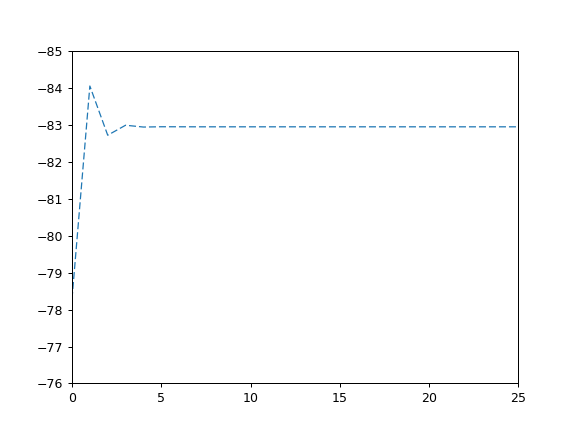

(-76, -85)

In [7]:
plt.plot(xx,ene222, '--',linewidth=1)
plt.xlim(0,25)
plt.ylim(-76,-85)

In [22]:
#This implements the extras in Project 3 - The molecular orbital basis to check whether transformation is 
#actually required or not.
import timing

print("\nThe final coefficient matrix obtained form HF is \n")

for row in range(eig_AO_store.shape[0]):
    for col in range(eig_AO_store.shape[1]):
        print('{:11.7f}'.format(eig_AO_store[row,col]),end=' ')
    print()
timing.log('Tracking the matrix multiplication time')
F_MO2=eig_AO_store.transpose().dot(fock).dot(eig_AO_store)
timing.endlog()
print("\nThe Fock matrix in the MO basis is \n")
for row in range(F_MO2.shape[0]):
    for col in range(F_MO2.shape[1]):
        print('{:11.7f}'.format(F_MO2[row,col]),end=' ')
    print()



The final coefficient matrix obtained form HF is 

 -0.9944346  -0.2391589  -0.0000000  -0.0936832  -0.0000000  -0.1116399  -0.0000000 
 -0.0240970   0.8857356   0.0000000   0.4795859   0.0000000   0.6695791   0.0000000 
  0.0000000   0.0000000  -0.6072848   0.0000000  -0.0000000   0.0000000  -0.9192343 
 -0.0031615   0.0858962  -0.0000000  -0.7474314   0.0000000   0.7384886   0.0000000 
  0.0000000  -0.0000000   0.0000000   0.0000000   1.0000000  -0.0000000  -0.0000000 
  0.0045937   0.1440396  -0.4529977  -0.3294712   0.0000000  -0.7098495   0.7324607 
  0.0045937   0.1440396   0.4529977  -0.3294712  -0.0000000  -0.7098495  -0.7324607 
17368 days, 17:24:27.471129 - Tracking the matrix multiplication time

17368 days, 17:24:27.471471 - End Program
Elapsed time: 0:06:22.708633


The Fock matrix in the MO basis is 

-20.2628916   0.0000000   0.0000000  -0.0000000  -0.0000000  -0.0000000   0.0000000 
 -0.0000000  -1.2096974   0.0000000   0.0000000   0.0000000   0.0000000  -0.0000000 
  

In [9]:
#The noddy algorithm for the transfrom of two electron integrals to the MO basis


#
